In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# Gradient Boosting Regression Tree

In [ ]:
# 그래디언트 부스팅 회귀 트리는 여러 개의 결정트리를 묶어 강력한 모델을 만드는 앙상블
# 이름은 회귀(Regression)이지만, 분류와 회귀 문제에서 사용가능
    # scikit learn, GradientBoostingClassifer GradientBoostingRegressor 둘다 회귀 트리인 DecisionTreeRegressor를 사용
    
# 랜덤포레스트와 달리, 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듬
# 그래디언트 부스팅 회귀 트리에는 무작위성이 없음, 대신 강력한 가지치기를 사용함
# 그래디언트 부스팅 트리는 보통 하나에서 다섯정도의 깊지 않은 트리를 사용함
    # 메모리를 적게 사용하고 예측또한 빠름
    
# 그래디언트 부스팅의 아이디어는 이런 얕은 트리 같은 간단 모델(약한 학습기_weak learner) 을 많이 연결 하는 것
# 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서, 트리가 많이 추가될 수록 성능이 좋아짐
    # 그래디언트 부스팅은 이전에 만든 트리의 예측과 타깃값 사이의 오차를 줄이는 방향으로 새로운 트리를 추가하는 알고리즘
    # 이를 위해, 손실 함수를 정의하고, 경사하강법(gradient descent)을 사용하여, 다음에 추가될 트리가 예측해야할 값을 보정해 나감
    
# 랜덤 포레스트 보다 매개변수 설정에 조금 더 민감하지만, 잘 조정한다면 더 높은 정확도를 제공
# 앙상블 방식에 있는 사전 가지치기 or 트리 갯수 매개변수 외에도, 이전 트리의 오차를 얼마나 강하게 보정할지에 대한
# learning_rate 매개변수 존재, 학습률이 크면 트리는 보정을 강하게 하기 때문에, 복잡한 모델을 만듬
# n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 더 커지고, 훈련 세트에서의 실수를 바로 잡을 기회가 많아짐


## Breast cancer dataset using GradientBoostingClassifer

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [36]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [37]:
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print('훈련 세트 정확도 : {:.4f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.0000
테스트 세트 정확도 : 0.9650


In [38]:
gbrt
# 깊이 3, 학습률 0.1, 트리갯수(n_estimators) 100

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [39]:
# 훈련 세트의 점수가 1.0, 과적합 가능성 있음
# 과적합 방지를 위해서 
    # 트리의 최대 깊이를 줄여, 사전 가지치기를 강화
    # 학습률을 낮추거나

In [53]:
gbrt_depth = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print('훈련 세트 정확도 : {:.4f}'.format(gbrt_depth.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(gbrt_depth.score(X_test, y_test)))

gbrt_late = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print('훈련 세트 정확도 : {:.4f}'.format(gbrt_late.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(gbrt_late.score(X_test, y_test)))

gbrt_test = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth = 2, n_estimators=10000).fit(X_train, y_train)

print('훈련 세트 정확도 : {:.4f}'.format(gbrt_test.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(gbrt_test.score(X_test, y_test)))

훈련 세트 정확도 : 0.9906
테스트 세트 정확도 : 0.9720
훈련 세트 정확도 : 0.9883
테스트 세트 정확도 : 0.9650
훈련 세트 정확도 : 1.0000
테스트 세트 정확도 : 0.9720


In [54]:
# 트리의 최대 깊이를 줄이거나 학습률을 낮추는 방법을 통해서 과적합을 방지할 수 있다
# 특히, 트리의 최대 깊이를 줄임으로서 테스트 세트의 성능 향상을 이룬걸 볼 수 있음


In [70]:
def plot_feat_importances_cancer(model):
    n_features = cancer.data.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel("attr importances")

    plt.ylabel("attr")
    plt.ylim(-1, n_features)

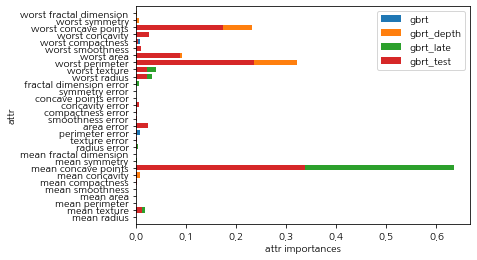

In [76]:
plot_feat_importances_cancer(gbrt)
plot_feat_importances_cancer(gbrt_depth)
plot_feat_importances_cancer(gbrt_late)
plot_feat_importances_cancer(gbrt_test)
plt.legend(['gbrt','gbrt_depth','gbrt_late','gbrt_test'])

In [78]:
# 그래디언트에서 일부 특성 중요도는 아예 무시당하고 있음
# 비슷한 종류의 데이터에서 그래디언트와 랜덤포레스트는 둘다 잘 작동함
# 대게 더 안정적인 랜덤 포레스트를 적용해본 후, 시간을 줄이거나 성능 최적화를 위해
# 그래디언트 부스팅을 사용하면 도움이 될 것

# 대규모 머신러닝 문제에 그래디언트를 적용하기위해, xgboost 패키지와 python 인터페이스를 검토해보는것이 좋음
# xgboost : 대용량 분산처리를 위한 그래디언트 부스팅 오픈소스 라이브러리, GPU플러그인 지원


# 정리